In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sys

In [2]:
data=pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51717, 17)

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
## Delete unecessary columns

del data['url']
del data['phone']
del data['address']
del data['location']

In [8]:
data.head(2)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [9]:
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

In [11]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                         'listed_in(city)':'city'})

In [12]:
X=data.copy()

In [13]:
X.online_order = X.online_order.apply(lambda x: '1' if str(x)=='Yes' else '0')
X.book_table = X.book_table.apply(lambda x: 1 if str(x)=='Yes' else '0')

In [14]:
X.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
rest_type       object
dish_liked      object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [15]:
X.rate.dtype

dtype('O')

In [16]:
X.rate = X.rate.astype(str)
X.rate = X.rate.apply(lambda x: x.replace('/5',''))
X.rate = X.rate.astype(float)

In [17]:
X.rate.dtype

dtype('float64')

In [18]:
X.cost.dtype

dtype('O')

In [19]:
X.cost=X.cost.astype(str)
X.cost=X.cost.apply(lambda y : y.replace(',',''))
X.cost=X.cost.astype(float)

In [20]:
X.cost.dtype

dtype('float64')

In [21]:
X.online_order=X.online_order.astype(float)
X.book_table=X.book_table.astype(float)
X.votes=X.votes.astype(float)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  float64
 2   book_table    51717 non-null  float64
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  float64
 5   rest_type     51490 non-null  object 
 6   dish_liked    23639 non-null  object 
 7   cuisines      51672 non-null  object 
 8   cost          51371 non-null  float64
 9   reviews_list  51717 non-null  object 
 10  menu_item     51717 non-null  object 
 11  type          51717 non-null  object 
 12  city          51717 non-null  object 
dtypes: float64(5), object(8)
memory usage: 5.1+ MB


In [23]:
X.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [24]:
X_del=X.copy()
X_del.dropna(how='any',inplace=True)

In [25]:
X_del.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [26]:
X_del.shape

(23259, 13)

In [27]:
X_del.drop_duplicates(keep='first',inplace=True)

E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'fig' is not defined

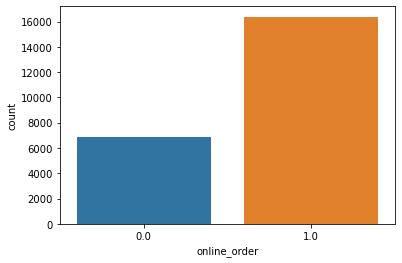

In [28]:
sns.countplot(X_del['online_order'])
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants delivering online or Not')

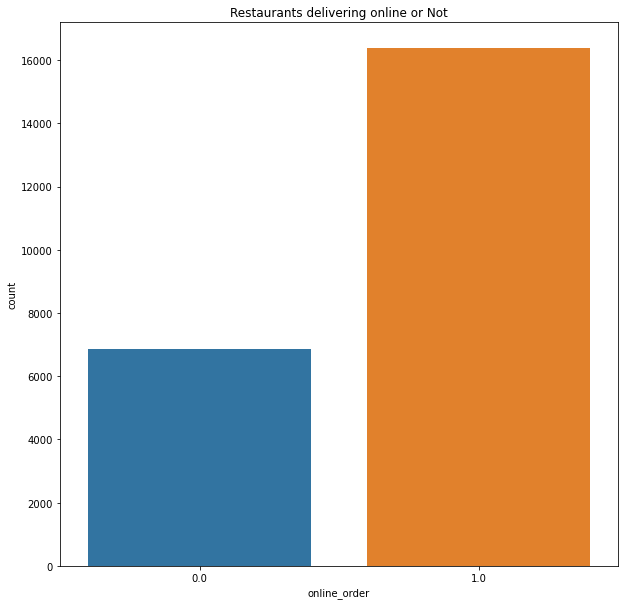

In [29]:
sns.countplot(X_del['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location')

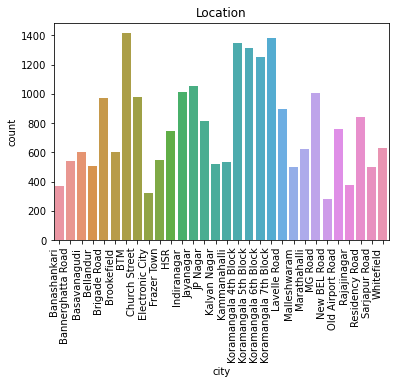

In [30]:
sns.countplot(X_del['city'])
sns.countplot(X_del['city']).set_xticklabels(sns.countplot(X_del['city']).get_xticklabels(), rotation=90, ha="right")
fig.set_size_inches(15,15)
plt.title('Location')

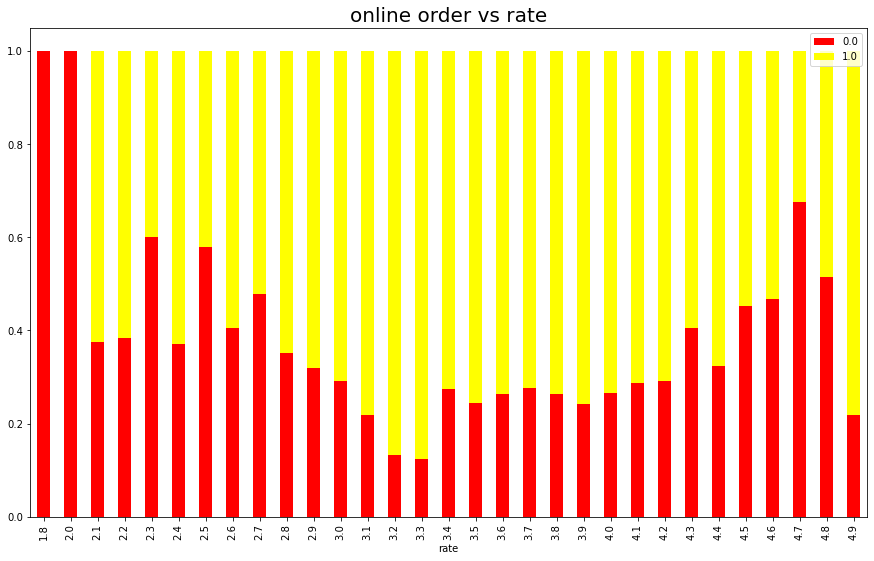

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(X_del['rate'], X_del['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('online order vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

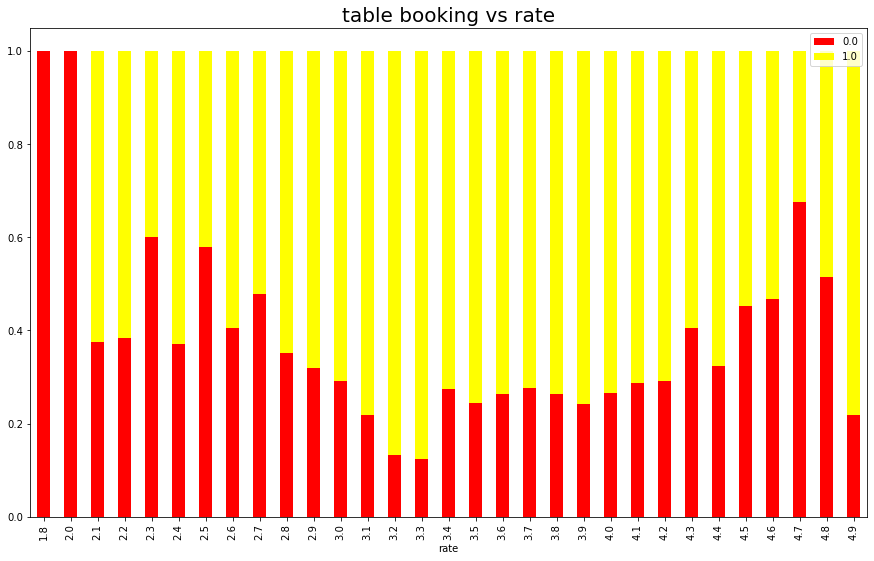

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
y = pd.crosstab(X_del['rate'], X_del['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

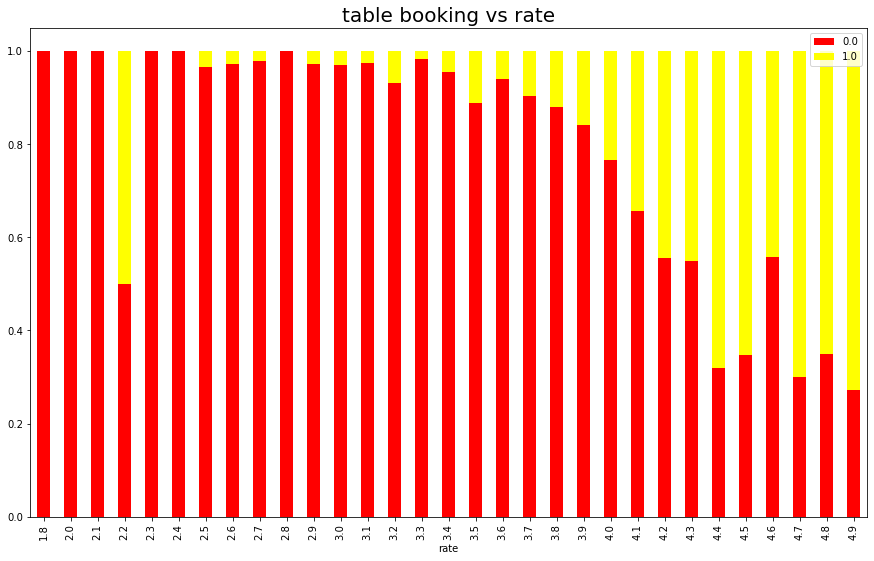

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
y = pd.crosstab(X_del['rate'], X_del['book_table'])
y.div(y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restuarant Type')

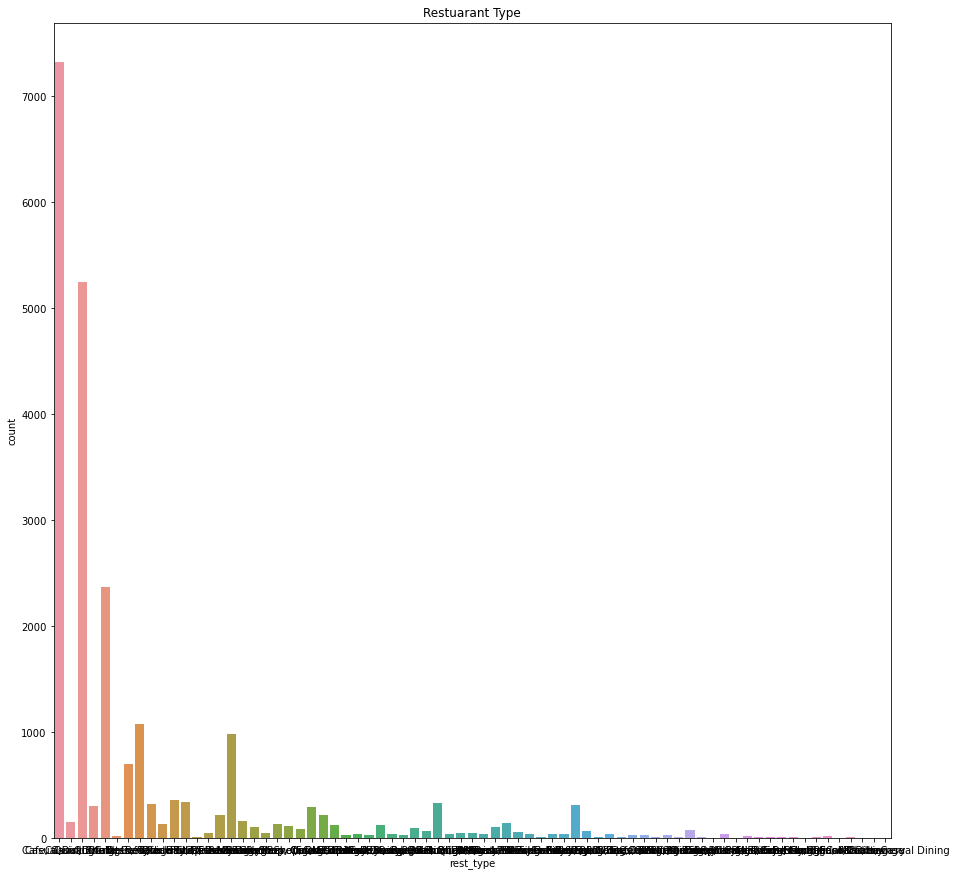

In [34]:
sns.countplot(X_del['rest_type'])
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restuarant Type')

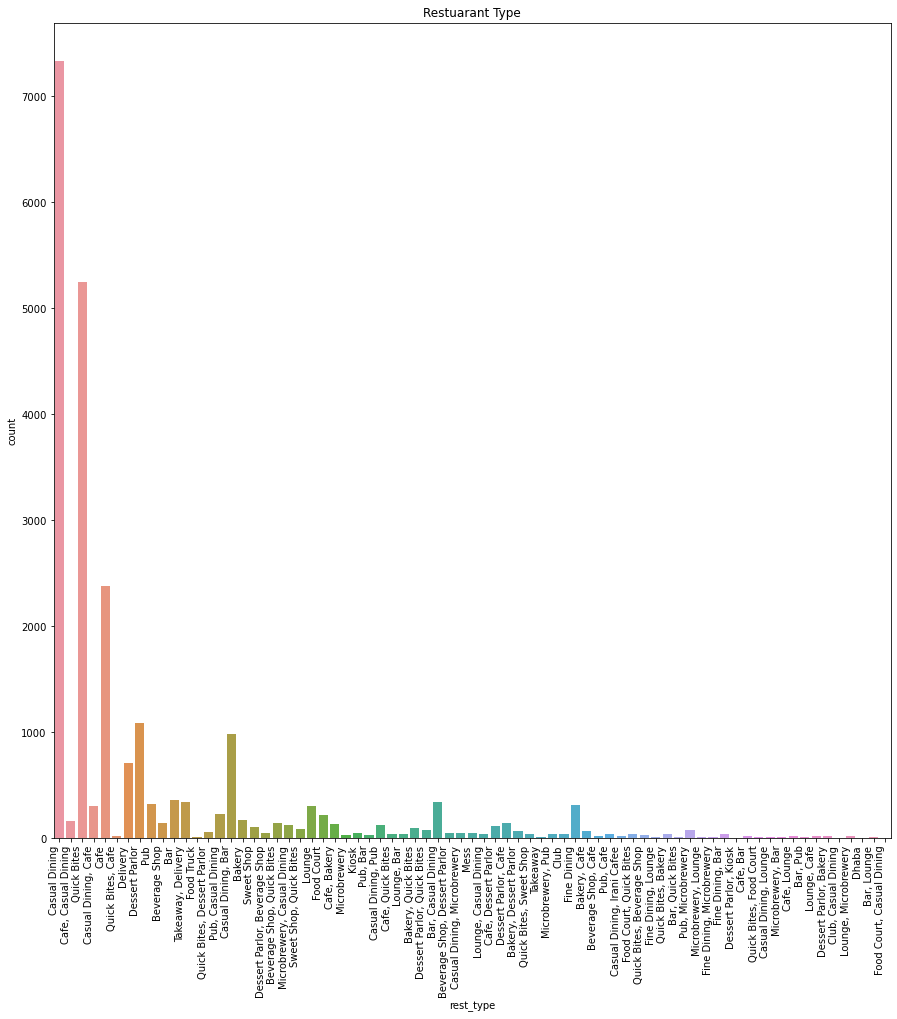

In [35]:
sns.countplot(X_del['rest_type'])
sns.countplot(X_del['rest_type']).set_xticklabels(sns.countplot(X_del['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

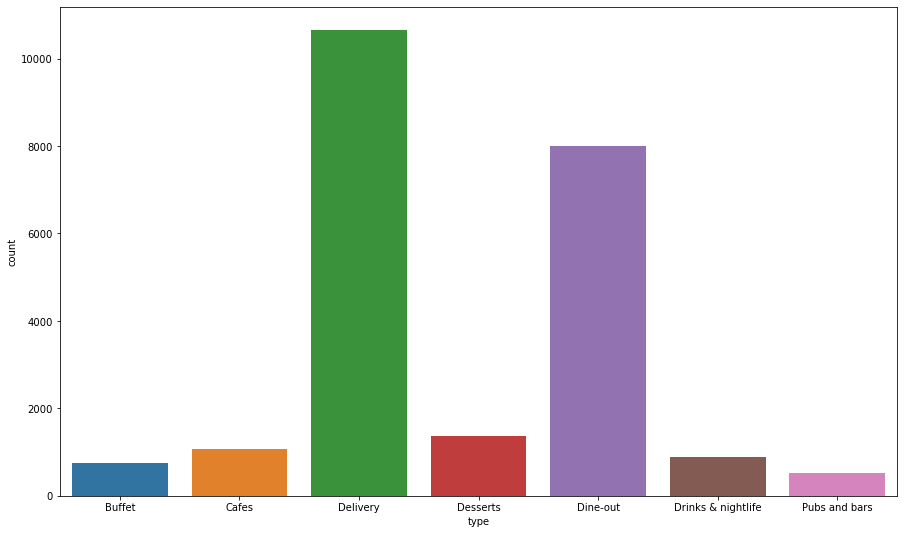

In [36]:
sns.countplot(X_del['type'])

E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\Rony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cost of Restuarant')

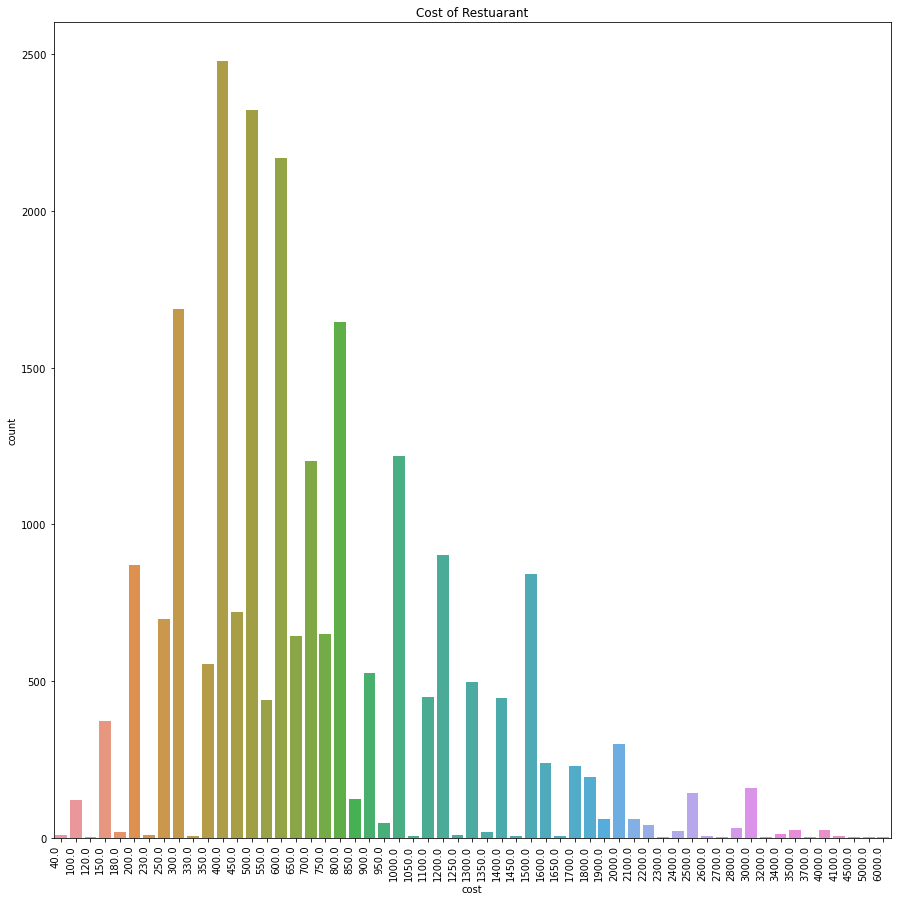

In [37]:
sns.countplot(X_del['cost'])
sns.countplot(X_del['cost']).set_xticklabels(sns.countplot(X_del['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

In [53]:
Y=X_del.copy()

In [54]:
dummy_rest_type=pd.get_dummies(Y['rest_type'])
dummy_type=pd.get_dummies(Y['type'])
dummy_city=pd.get_dummies(Y['city'])
dummy_cuisines=pd.get_dummies(Y['cuisines'])
dummy_dishliked=pd.get_dummies(Y['dish_liked'])
#dummy_reviewslist=pd.get_dummies(Y['reviews_list']) #Too much memory allocation

In [55]:
Y=pd.concat([Y,dummy_rest_type,dummy_type,dummy_city,dummy_cuisines,dummy_dishliked,#dummy_reviewslist
            ],axis=1)

In [56]:
del Y['rest_type']
del Y['type']
del Y['city']
del Y['cuisines']
del Y['dish_liked']
#del Y['reviews_list']

In [57]:
Y.head(3)

,name,online_order,book_table,rate,votes,cost,reviews_list,menu_item,Bakery,"Bakery, Cafe",...,"Wings, Lime Soda, Manchow Soup, Biryani, Fried Rice, Chop Suey, Tandoori Roti","Wings, Pizza","Wonton, American Chopsuey",Wood Fire Pizza,"Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Mocktails","Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Nachos","Zinger Burger, Burgers, Popcorn Chicken","Zinger Burger, Crispy Chicken, Rice Bowl, Hot Wings, Pizza, Chicken Popcorn, Virgin Mojito","Zinger Burger, French Fries, Choco Lash, Hot Wings, Virgin Mojito","Zinger Burger, Hot Wings, Chicken Wings, Crispy Chicken, Fries"
0,Jalsa,1.0,1.0,4.1,775.0,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1.0,0.0,4.1,787.0,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1.0,0.0,3.8,918.0,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [60]:
x=Y.drop(['name',#'dish_liked',
          'reviews_list',
          'menu_item',#'cuisines'
         ],axis=1);

In [61]:
x_fit=scaler.fit_transform(x)

In [62]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Columns: 6990 entries, online_order to Zinger Burger, Hot Wings, Chicken Wings, Crispy Chicken, Fries
dtypes: float64(5), uint8(6985)
memory usage: 156.4 MB


In [ ]:
x.head()

In [66]:
from sklearn.feature_selection import SelectKBest

In [ ]:
corr_x=x.corr().abs()
corr_x

In [ ]:
col_r=list(x)
col_r

In [ ]:
col_r.insert(0, col_r.pop(col_r.index('rate')))

In [ ]:
col_r

In [ ]:
x_1 = x.loc[:, col_r]

In [ ]:
x_1.head()

In [ ]:
x_1.info()

In [ ]:
for i,a in enumerate(x_1.columns.values[0:1809]):
    print('%s is %d' % (a,i))

In [63]:
X_init=x.drop(['rate'],axis=1)
split_x=X_init.iloc[:,:]
split_x.info()
split_x.shape
split_x

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Columns: 6989 entries, online_order to Zinger Burger, Hot Wings, Chicken Wings, Crispy Chicken, Fries
dtypes: float64(4), uint8(6985)
memory usage: 156.3 MB


,online_order,book_table,votes,cost,Bakery,"Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Quick Bites",Bar,"Bar, Casual Dining",...,"Wings, Lime Soda, Manchow Soup, Biryani, Fried Rice, Chop Suey, Tandoori Roti","Wings, Pizza","Wonton, American Chopsuey",Wood Fire Pizza,"Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Mocktails","Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Nachos","Zinger Burger, Burgers, Popcorn Chicken","Zinger Burger, Crispy Chicken, Rice Bowl, Hot Wings, Pizza, Chicken Popcorn, Virgin Mojito","Zinger Burger, French Fries, Choco Lash, Hot Wings, Virgin Mojito","Zinger Burger, Hot Wings, Chicken Wings, Crispy Chicken, Fries"
0,1.0,1.0,775.0,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,787.0,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,918.0,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,88.0,300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,166.0,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,1.0,1.0,128.0,1200.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51707,0.0,0.0,77.0,2000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51708,0.0,0.0,161.0,1200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51711,0.0,0.0,81.0,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Y_init=x.drop(x.columns.difference(['rate']),axis=1)
split_y=Y_init.iloc[:,:]
split_y=split_y.astype(float)
split_y.shape
split_y

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51705,3.8
51707,3.9
51708,2.8
51711,2.5


In [67]:
bestfeatures=SelectKBest(k='all')
fit=bestfeatures.fit(split_x,split_y)

E:\Users\Rony\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\Users\Rony\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [68]:
fit

SelectKBest(k='all')

In [69]:
scores=pd.DataFrame(fit.scores_)
columns_=pd.DataFrame(split_x.columns)

In [70]:
featurescore=pd.concat([columns_,scores],axis=1)

In [71]:
featurescore.columns = ['Features','Score']

In [72]:
print(featurescore.nlargest(20,'Score'))

                                               Features        Score
3668                                                 Dj          inf
3650                                    Dance Floor, Dj  3480.902200
4932  Nachos, Pizza, Margarita, Mushroom Soup, Tacos...   773.034489
4818     Mutton Biryani, Chilli Paneer, Chicken Biryani   463.860640
2                                                 votes   416.418856
248                         Asian, Chinese, Thai, Momos   407.480920
4975  Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...   289.525917
5062                          Noodles, Tandoori Chicken   231.910347
3391  Coffee, Berryblast, Nachos, Chocolate Waffles,...   215.461147
1223                                            Mexican   210.083900
5849            Raita, Vegetable Biryani, Biryani Combo   193.100500
1                                            book_table   177.105552
4909  Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...   171.896405
2953  Chicken Guntur, Vegetable Bi

In [74]:
col_select=featurescore.nlargest(800,'Score')

In [75]:
col_select.drop('Score',axis=1,inplace=True)

In [76]:
col_select_list=list(col_select.Features)

In [77]:
col_select_list

['Dj',
 'Dance Floor, Dj',
 'Nachos, Pizza, Margarita, Mushroom Soup, Tacos, Tortilla Soup, Chicken Burritos',
 'Mutton Biryani, Chilli Paneer, Chicken Biryani',
 'votes',
 'Asian, Chinese, Thai, Momos',
 'Noodles, Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns, Cocktails, Prawn Sushi, Treasure Soup',
 'Noodles, Tandoori Chicken',
 'Coffee, Berryblast, Nachos, Chocolate Waffles, Nutella Waffle, Chocolate Overload, Sandwiches',
 'Mexican',
 'Raita, Vegetable Biryani, Biryani Combo',
 'book_table',
 'Naan, Pot Biryani, Chicken Guntur, Paneer Tikka, Tandoori Roti, Thali, Lassi',
 'Chicken Guntur, Vegetable Biryani, Executive Chicken Biryani, Mutton Biryani, Hyderabadi Chicken Biryani',
 'Khichda, Gaon Ki Thali, Buttermilk, Dal Makhani, Paratha, Shikanji, Paneer Bhurji',
 'Rolls, Rasgulla, Fish Fry, Bhetki Paturi, Mutton Kosha, Veg Thali, Luchi',
 'North Indian, Thai, Japanese, Continental, Cafe',
 'cost',
 'Raita, Thali, Paratha, Chole, Buttermilk, Paneer Bhurji, Rice',
 'Continental, Nor

In [78]:
x_select=split_x.loc[:,col_select_list]

In [79]:
x_select.head()

,Dj,"Dance Floor, Dj","Nachos, Pizza, Margarita, Mushroom Soup, Tacos, Tortilla Soup, Chicken Burritos","Mutton Biryani, Chilli Paneer, Chicken Biryani",votes,"Asian, Chinese, Thai, Momos","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns, Cocktails, Prawn Sushi, Treasure Soup","Noodles, Tandoori Chicken","Coffee, Berryblast, Nachos, Chocolate Waffles, Nutella Waffle, Chocolate Overload, Sandwiches",Mexican,...,"North Indian, Mughlai, Biryani",Friendly Staff,"Continental, North Indian, Chinese, American",Delivery,Delivery,"Cafe, Italian, Continental, European, Biryani, Chinese","Chinese, South Indian, Andhra, North Indian, Biryani","Mangalorean, Chinese, North Indian, Biryani","North Indian, Chinese, Momos, Rolls","Oriya, North Indian, Chinese"
0,0,0,0,0,775.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,787.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,918.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,88.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,166.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
x_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Columns: 806 entries, Dj to Oriya, North Indian, Chinese
dtypes: float64(4), uint8(802)
memory usage: 19.2 MB


In [81]:
x_select = x_select.loc[:, ~x_select.columns.duplicated()]

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_select,split_y,test_size=0.05,random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [84]:
linreg.fit(X_train,y_train)

LinearRegression()

In [85]:
Y_linreg_pred=linreg.predict(X_test)

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,Y_linreg_pred)

0.7262059027460742

In [88]:
acc_len=linreg.score(X_train,y_train)

In [89]:
acc_len

0.74974781509897